<a href="https://colab.research.google.com/github/srushtipawargmail/Srushti/blob/main/Assessment_dendrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installing the required packages

In [ ]:
!pip install striprtf

In [ ]:
!pip install xgboost

### Importing the packages and libraries

In [ ]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

### Parsing the json file with the specific format that was given

In [ ]:
## Parsing the json file
from striprtf.striprtf import rtf_to_text
with open("algoparams_from_ui.json.rtf") as infile:
    content = infile.read()
    text = rtf_to_text(content)
print(text)

{
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {

      "session_info" : {
        "project_id": "1",
        "experiment_id": "kkkk-11",
        "dataset":"iris_modified.csv",
        "session_name": "test",
        "session_description": "test"
        },

      "target": {
        "prediction_type": "Regression",
        "target": "petal_width",
        "type":"regression",
        "partitioning": true
      },
      "train": {
        "policy": "Split the dataset",
        "time_variable": "sepal_length",
        "sampling_method": "No sampling(whole data)",
        "split": "Randomly",
        "k_fold": false,
        "train_ratio": 0,
        "random_seed": 0
      },
      "metrics": {
        "optomize_model_hyperparameters_for": "AUC",
        "optimize_threshold_for": "F1 Score",
        "compute_lift_at": 0,
        "cost_matrix_gain_for_true_prediction_true_result": 1,
        "cost_matrix_gain_for_true_prediction_false_result": 0,

### Reading the json file

In [ ]:
read_data= json.loads(text)

In [ ]:
type(read_data)

dict

### Reading the features in the csv file

In [ ]:
df=pd.read_csv("iris.csv")

In [ ]:
#Printing the top 5 rows of the csv file
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Prints the size of the data i.e number of rows and columnns
df.shape

(150, 5)

In [ ]:
#Prints the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Computes and displays summary statistics of a dataframe
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Plots w.r.t the dataset

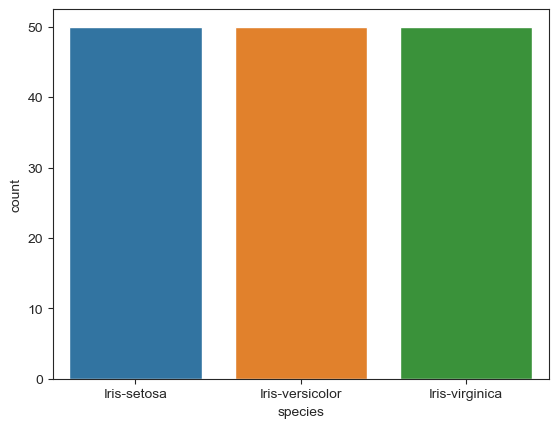

In [ ]:
sns.set_style('ticks')
sns.countplot(x='species',data=df)
plt.show()

In [ ]:
# Converting Objects to Numerical dtype
#df.drop(['species'], axis= 1, inplace=True)

In [ ]:
#Checking total null values in the dataframe and drops the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.duplicated().sum()

3

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df = df.loc[:, df.columns!='species']
cor=df.corr()
cor

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


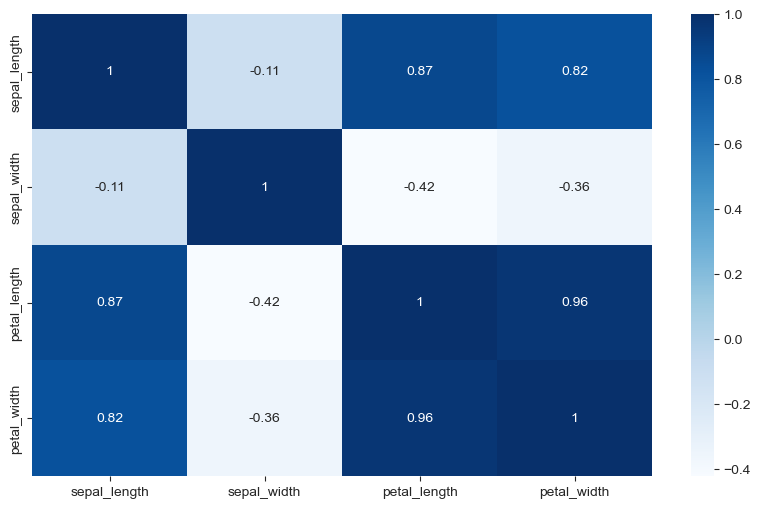

In [ ]:
#df.loc[:, df.columns!='petal_width']
cor=df.corr()
top_cor=cor.index
plt.figure(figsize=(10,6))
g=sns.heatmap(df[top_cor].corr(),annot=True,cmap='Blues')

In [ ]:
target = read_data['design_state_data']['target']
target

{'prediction_type': 'Regression',
 'target': 'petal_width',
 'type': 'regression',
 'partitioning': True}

In [ ]:
## Models with their hypermeter details
read_data['design_state_data']['algorithms']

{'RandomForestClassifier': {'model_name': 'Random Forest Classifier',
  'is_selected': False,
  'min_trees': 10,
  'max_trees': 30,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 30,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 50,
  'parallelism': 0},
 'RandomForestRegressor': {'model_name': 'Random Forest Regressor',
  'is_selected': True,
  'min_trees': 10,
  'max_trees': 20,
  'feature_sampling_statergy': 'Default',
  'min_depth': 20,
  'max_depth': 25,
  'min_samples_per_leaf_min_value': 5,
  'min_samples_per_leaf_max_value': 10,
  'parallelism': 0},
 'GBTClassifier': {'model_name': 'Gradient Boosted Trees',
  'is_selected': False,
  'num_of_BoostingStages': [67, 89],
  'feature_sampling_statergy': 'Fixed number',
  'learningRate': [],
  'use_deviance': True,
  'use_exponential': False,
  'fixed_number': 22,
  'min_subsample': 1,
  'max_subsample': 2,
  'min_stepsize': 0.1,
  'max_stepsize': 0.5,
  'min_iter': 20,
  'max_i

In [ ]:
#All names of the models in the data
#Note: But we preferred only the regressor models
for i in data['design_state_data']['algorithms']:
    print(i)

RandomForestClassifier
RandomForestRegressor
GBTClassifier
GBTRegressor
LinearRegression
LogisticRegression
RidgeRegression
LassoRegression
ElasticNetRegression
xg_boost
DecisionTreeRegressor
DecisionTreeClassifier
SVM
SGD
KNN
extra_random_trees
neural_network


In [ ]:
X=df.drop('petal_width',axis=1)
y=df['petal_width']

#### Importing required packages to run the models

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Note: As a part of this work, the type of model we have selected is only Regression models:

#### 1. Random Forest Regressor:

In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor(n_estimators = 20,min_samples_leaf = 10,max_depth=25)
rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error:  {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error:  0.028488910644777148
Root Mean Squared Error: 0.16878658313022735
Mean Absolute Error: 0.14262775479798362
r^2 score: 0.9523985972443572


#### 2. Gradient Boosting Regressor:

In [ ]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators= 89,max_depth=7)
gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error:  {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error:  0.03516642902671816
Root Mean Squared Error: 0.18752714210673121
Mean Absolute Error: 0.13852519185330933
r^2 score: 0.9412413000816012


#### 3. Linear Regression:
###### Note: Because Logistic regression is also a classifier model, we didn't use that model

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error:  {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error:  0.03521297842344769
Root Mean Squared Error: 0.18765121482006902
Mean Absolute Error: 0.15152870035344632
r^2 score: 0.9411635218678469


#### 4. Lasso Regression:

In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
lsr = Lasso(max_iter = 30)
lsr.fit(X_train,y_train)

y_pred = lsr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 scor: {r2}")

Mean Squared Error: 0.4018425399099205
Root Mean Squared Error: 0.6339105141184523
Mean Absolute Error: 0.5486786517381338
r^2 scor: 0.32857142819150376


#### 5. Ridge Regression:

In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge
rdg = Ridge(max_iter = 30)
rdg.fit(X_train,y_train)

y_pred = rdg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error: 0.03416894028877361
Root Mean Squared Error: 0.18484842517255484
Mean Absolute Error: 0.1491285119991014
r^2 score: 0.9429079788729091


#### 6. ElasticNet Regression:

In [ ]:
#ElasticNet Regression
from sklearn.linear_model import ElasticNet
enr = ElasticNet(max_iter = 30)
enr.fit(X_train,y_train)

y_pred = enr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error: 0.18243961078402707
Root Mean Squared Error: 0.42712950118673265
Mean Absolute Error: 0.35964373017968165
r^2 score: 0.6951662525886968


#### 7. Xgboost Regression:

In [ ]:
#Xgboost Regression
import xgboost as xg
xgb = xg.XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error: 0.037056672527414396
Root Mean Squared Error: 0.1925010974706752
Mean Absolute Error: 0.1531430612007777
r^2 score: 0.9380829398583972


#### 8. Decision Tree Regression:

In [ ]:
#Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf = 10)
dtr.fit(X_train,y_train)

dtr_pred = dtr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error: 0.03454442348656634
Root Mean Squared Error: 0.18586130174559293
Mean Absolute Error: 0.13906637806637803
r^2 score: 0.9422805934614776


#### 9. SVM: SVR Regression:

In [ ]:
#SVR Regression
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf',gamma = 5,max_iter = 5)
svr.fit(X_train,y_train)

svr_pred = svr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score :{r2}")

Mean Squared Error: 0.037056672527414396
Root Mean Squared Error: 0.1925010974706752
Mean Absolute Error: 0.1531430612007777
r^2 score :0.9380829398583972


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


#### 10. ElasticTrees Regressor:

In [ ]:
#ExtraTrees Regressor
from sklearn.ensemble import ExtraTreesRegressor
ext_reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
ext_reg.fit(X_train, y_train)

y_pred = ext_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error: 0.03088814166666665
Root Mean Squared Error: 0.17575022522508085
Mean Absolute Error: 0.14568333333333328
r^2 score: 0.9483897826006238


#### 11. Neural Network Regressor: Multi-layer Perceptron Regressor:

In [ ]:
#Multi-layer Perceptron Regressor
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(random_state=0, max_iter=500)
mlp_reg.fit(X_train, y_train)

y_pred = mlp_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"r^2 score: {r2}")

Mean Squared Error: 0.3076732936813692
Root Mean Squared Error: 0.5546830569625948
Mean Absolute Error: 0.4532336051532716
r^2 score: 0.4859164482525764


#### Bar plot below describes the various metrics scores for all the models used:

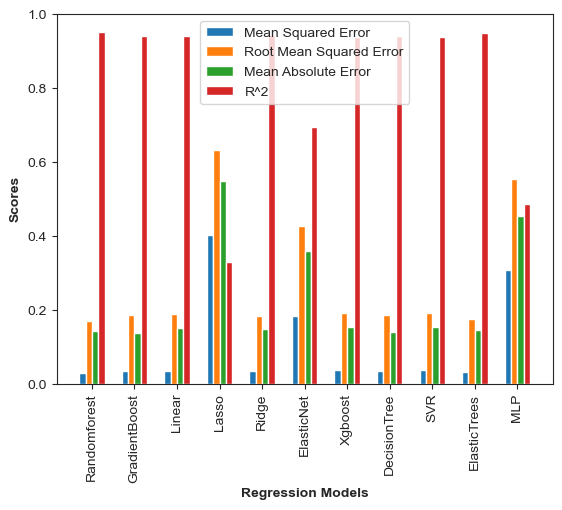

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their metric scores
models = ['Randomforest', 'GradientBoost', 'Linear', 'Lasso', 'Ridge', 'ElasticNet', 'Xgboost', 'DecisionTree', 'SVR', 'ElasticTrees', 'MLP']
mse_scores =[0.028488910644777148, 0.03516642902671816, 0.03521297842344769, 0.4018425399099205, 0.03416894028877361, 0.18243961078402707, 0.037056672527414396, 0.03454442348656634, 0.037056672527414396, 0.03088814166666665, 0.3076732936813692]
rmse_scores = [0.16878658313022735, 0.18752714210673121, 0.18765121482006902, 0.6339105141184523, 0.18484842517255484, 0.42712950118673265, 0.1925010974706752, 0.18586130174559293, 0.1925010974706752, 0.17575022522508085, 0.5546830569625948]
mae_scores = [0.14262775479798362, 0.13852519185330933, 0.15152870035344632, 0.5486786517381338, 0.1491285119991014, 0.35964373017968165, 0.1531430612007777, 0.13906637806637803, 0.1531430612007777, 0.14568333333333328, 0.4532336051532716]
r2_scores = [0.9523985972443572, 0.9412413000816012, 0.9411635218678469, 0.32857142819150376, 0.9429079788729091, 0.6951662525886968, 0.9380829398583972,0.9422805934614776, 0.9380829398583972, 0.9483897826006238, 0.4859164482525764]

# Set the width of each bar
barWidth = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create the bar graph
plt.bar(r1, mse_scores, width=barWidth, edgecolor='white', label='Mean Squared Error')
plt.bar(r2, rmse_scores, width=barWidth, edgecolor='white', label='Root Mean Squared Error')
plt.bar(r3, mae_scores, width=barWidth, edgecolor='white', label='Mean Absolute Error')
plt.bar(r4, r2_scores, width=barWidth, edgecolor='white', label='R^2')

# Add xticks on the middle of the group bars
plt.xticks(rotation=90)
plt.xlabel('Regression Models', fontweight='bold')
plt.xticks([r + barWidth*1.5 for r in range(len(models))], models)

# Add y label and legend
plt.ylabel('Scores', fontweight='bold')
plt.legend()

# Show the bar graph
plt.show()
